# Importing Dataset

In [ ]:
import pandas

table = pandas.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/nba-player-stats-2019.csv')
table

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


# Assigning the Y and X axis

In [ ]:
y = table['PTS']  #these will be the values to be predicted
y

0       5.3
1       1.7
2       3.2
3      13.9
4       8.9
       ... 
703    11.5
704     7.8
705     8.9
706     8.5
707     9.4
Name: PTS, Length: 708, dtype: float64

In [ ]:
x = table.drop(['Player','PTS','Pos','Tm','FG','FG%','3P','3P%','2P','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF'],axis=1) #these will be the parameters used to predict player points per game
x

,Age,G,GS,MP,FGA,3PA,2PA
0,25,31,2,19.0,5.1,4.1,1.0
1,28,10,0,12.3,1.8,1.5,0.3
2,22,34,1,12.6,3.2,2.2,1.1
3,25,80,80,33.4,10.1,0.0,10.1
4,21,82,28,23.3,5.9,0.2,5.7
...,...,...,...,...,...,...,...
703,29,4,1,20.5,7.0,0.0,7.0
704,22,59,25,18.3,5.6,0.0,5.6
705,21,59,37,17.6,6.4,0.0,6.4
706,21,33,12,15.6,5.8,0.0,5.8


# Splitting the table to train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42) #setting 25% of table to be set for testing

# Predicting using random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randF = RandomForestRegressor(max_depth=2, random_state=100)
randF.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
y_randF_train_pred = randF.predict(x_train) #using a random forest model to make predictions
y_randF_test_pred = randF.predict(x_test)

# Evaluating Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  #looking at how well the model performed in its predictions by comparing predicted values with actual values
randF_train_mse = mean_squared_error(y_train, y_randF_train_pred)
randF_train_r2 = r2_score(y_train, y_randF_train_pred)

randF_test_mse = mean_squared_error(y_test, y_randF_test_pred)
randF_test_r2 = r2_score(y_test, y_randF_test_pred)

In [ ]:
randF_train_mse

2.7711913660487544

In [ ]:
randF_test_mse

2.934429219974805

In [ ]:
randF_test_r2

0.8979427442705589

In [ ]:
randF_train_r2

0.9221915850436918

# Plotting Performance

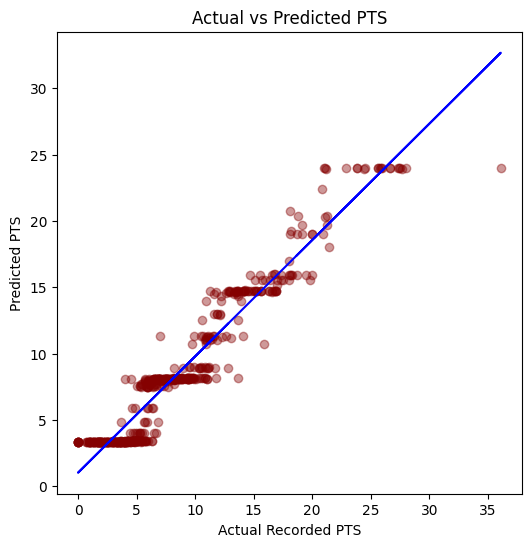

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))
plt.scatter (x=y_train, y=y_randF_train_pred, c = '#850101', alpha=0.4)  #ideally, perfect prediction would mean a straight y=x line

z = np.polyfit(y_train, y_randF_train_pred,1)
p =  np.poly1d(z)

plt.ylabel('Predicted PTS')
plt.xlabel('Actual Recorded PTS')
plt.title('Actual vs Predicted PTS')
plt.plot(y_train, p(y_train), '#0000FF')